In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import random
from imutils import paths
from sklearn.utils import shuffle

In [3]:
#Model
num_classes=6

base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, classes=num_classes)

x = tf.keras.layers.GlobalAveragePooling2D(input_shape=base_model.output_shape[1:])(base_model.output)
x = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_initializer='glorot_normal')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=x)

#load weights
model.load_weights('../models/mobilenet_fine_trashnet_120.h5')

## LOAD VALIDATION DATASET

In [4]:
# parameters
batch_size = 32
target_size = (224, 224)
labels = {'trash': 5, 'glass': 1, 'plastic': 4, 'cardboard': 0, 'paper': 3, 'metal': 2}


########################################################################
#VAL
val_path = '../datasets/dataset-resized/val'

x_val = []
val_labels = []


val_imagePaths = sorted(list(paths.list_images(val_path)))
#print(val_imagePaths)

for imagePath in val_imagePaths:
    if '.ipynb_checkpoints' not in imagePath:
        #print(imagePath)
        img = cv2.imread(imagePath)
        #img = cv2.resize(img, target_size).flatten()
        img = cv2.resize(img, target_size)
        x_val.append(img)

    
    label = imagePath.split(os.path.sep)[-2]
    if label!='.ipynb_checkpoints':
    #if labels[label] not in val_labels:
    #    val_labels.append(labels[label])
        val_labels.append(labels[label])
    

x_val , val_labels = shuffle(x_val, val_labels)

print("len x_val", len(x_val))
print("x_val[0] shape", x_val[0].shape)
print("len val_labels", len(val_labels))

x_val = np.array(x_val, dtype="float") / 255.0
val_labels = np.array(val_labels)

len x_val 328
x_val[0] shape (224, 224, 3)
len val_labels 328


In [11]:
num_classes = 6
y_val = tf.keras.utils.to_categorical(val_labels, num_classes=num_classes)

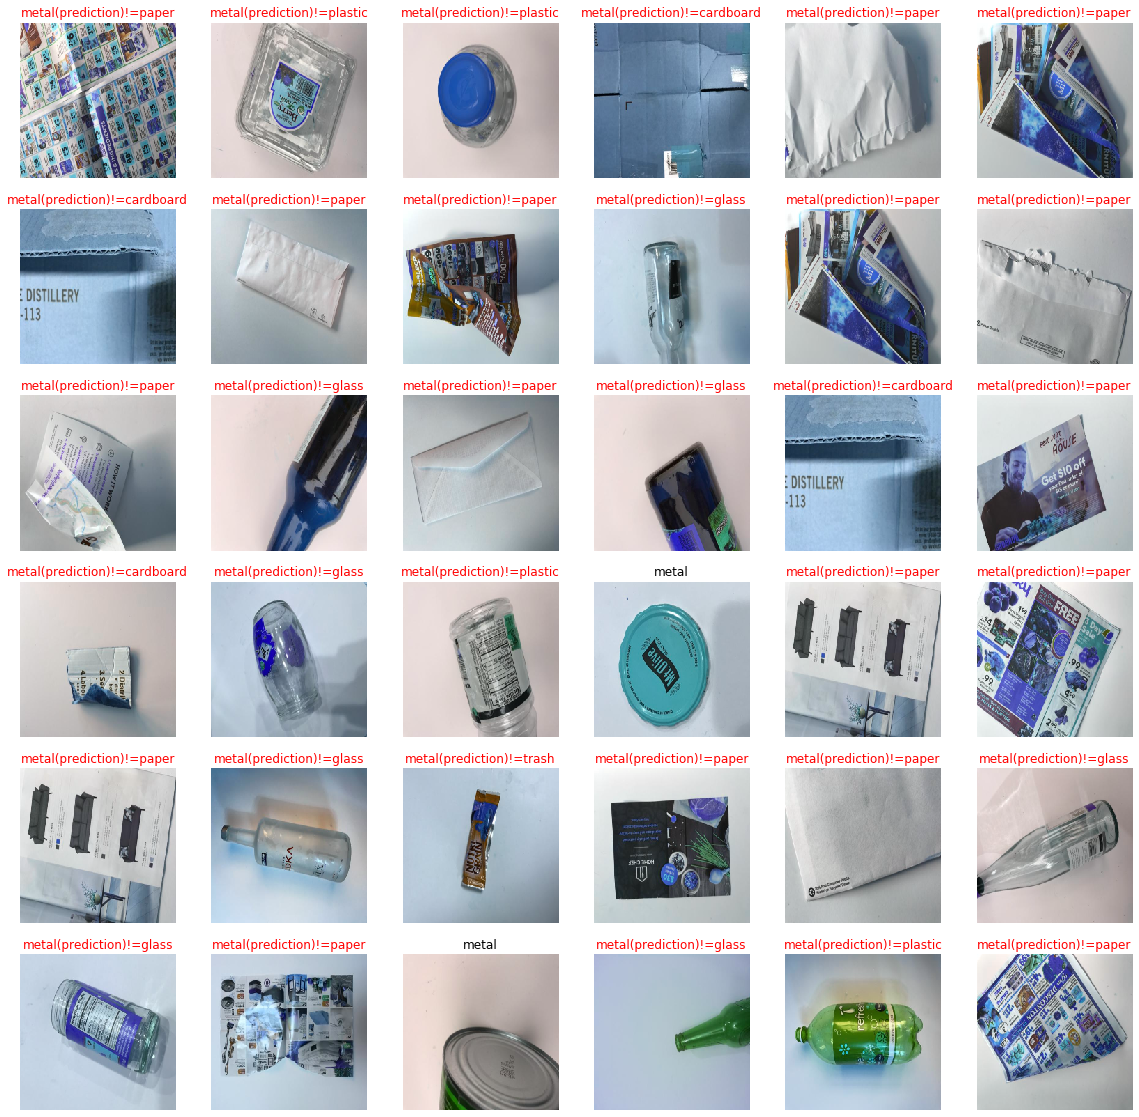

In [20]:
plt.figure(figsize=(20,20))

right = 0
mistake = 0
prefictionNum = 36
labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

for i in range(prefictionNum):
    index = random.randint(0, x_val.shape[0])
    image = x_val[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(6, 6, i+1)
    plt.imshow(image)
    plt.axis('off')
    
    bestclass = np.argmax(pred, axis=1)[0]
    #print("bestclass", bestclass)
    
    y_class = np.argmax(y_val[index])
    if y_class == bestclass:
        plt.title(labels[bestclass])
        right += 1
    else:
        #sagdaki dogru, soldaki prediction sonucu
        plt.title(labels[bestclass] + "(prediction)!=" + labels[y_class], color='#ff0000')
        mistake += 1
        
plt.show()